In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sqlalchemy import create_engine, text
from database import fetch_data, check_missing_values, update_database, engine
from model import df

In [11]:
# Choropleth Map - Heatmap of Sales Quantity by Country
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="quantity",
    color_continuous_scale="Reds",
    title="Heatmap of Sales Quantity by Country"
)

fig.show()

In [12]:
#Correlation Heatmap 
def correlation_heatmap(df, table_name):

    plt.figure(figsize=(10, 6))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Correlation Matrix for '{table_name}' Table")
    plt.show()

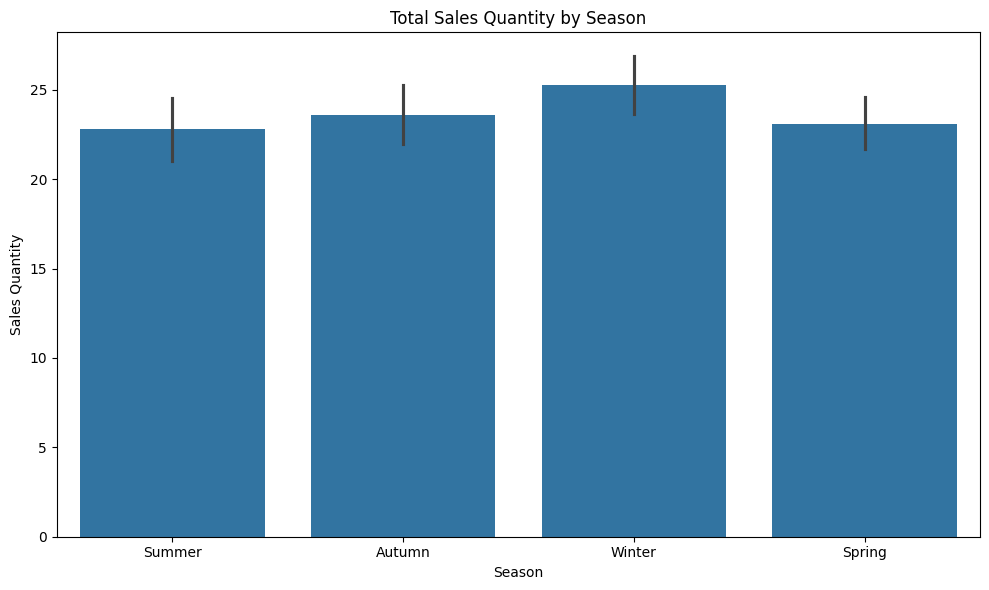

In [13]:
# Bar Chart - Total Sales Quantity by Season
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='quantity', data=df)
plt.title("Total Sales Quantity by Season")
plt.xlabel("Season")
plt.ylabel("Sales Quantity")
plt.tight_layout()
plt.show()

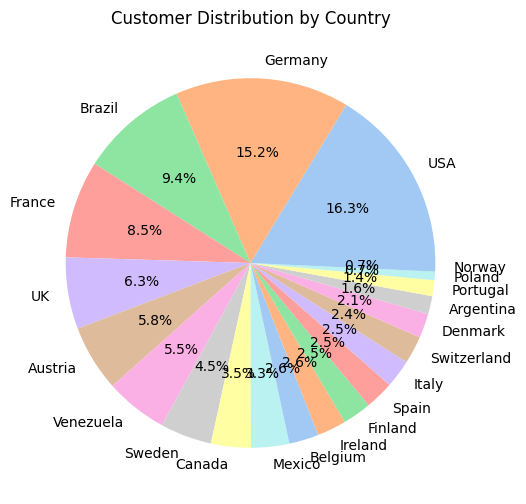

In [14]:
# Pie Chart - Customer Distribution by Country
country_counts = df["country"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Customer Distribution by Country")
plt.savefig("customer_distribution.png", dpi=300)
plt.show()

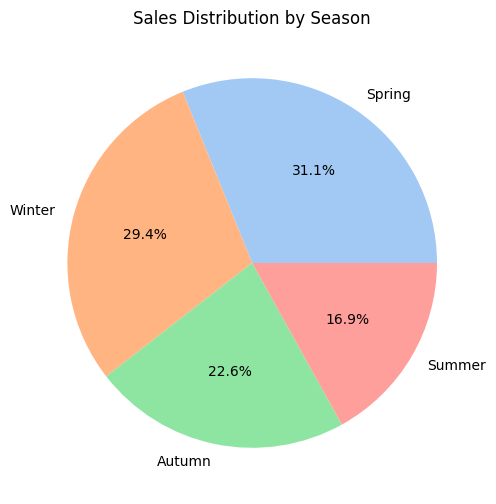

In [15]:
# Pie Chart - Sales Distribution by Season
season_counts = df["season"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Season")
plt.savefig("season_distribution.png", dpi=300)
plt.show()

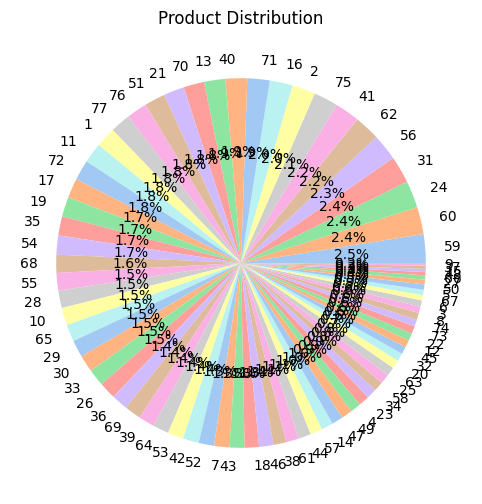

In [16]:
# Pie Chart - Product Distribution
product_counts = df["product_id"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Product Distribution")
plt.savefig("product_distribution.png", dpi=300)
plt.show()

D:\CLRnet\Temp\ipykernel_29104\373822983.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




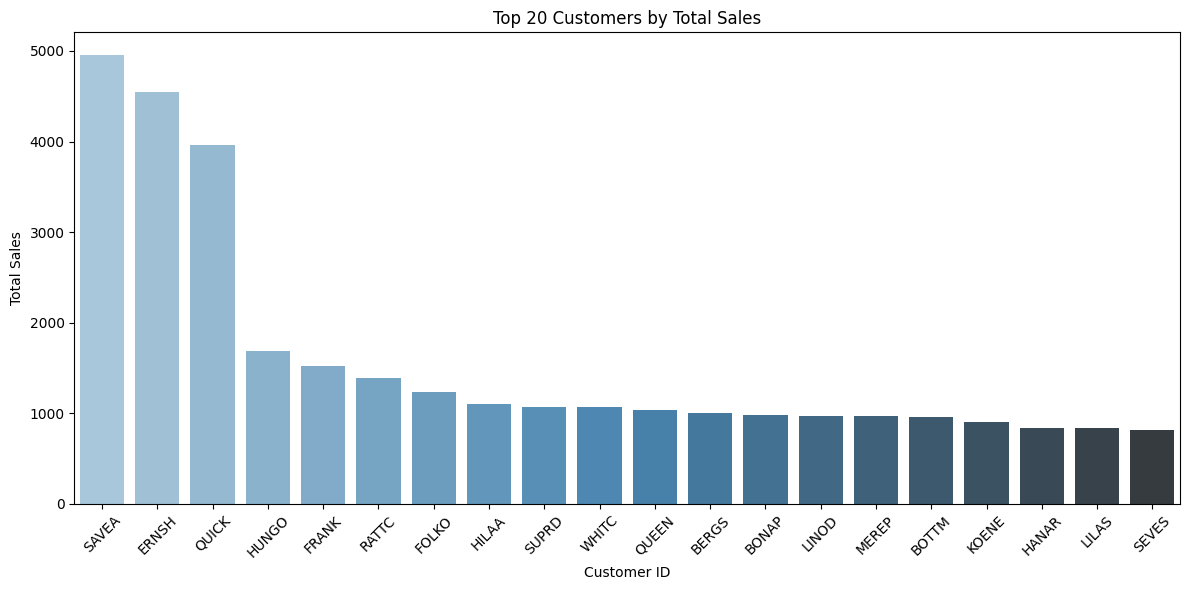

In [17]:
# Bar Chart - Top 20 Customers by Total Sales
if "price" in df.columns:
    df["total_sale"] = df["quantity"] * df["price"]
    customer_sales = df.groupby("customer_id")["total_sale"].sum().sort_values(ascending=False)
else:
    # If only quantity is considered:
    customer_sales = df.groupby("customer_id")["quantity"].sum().sort_values(ascending=False)

# Convert to DataFrame for plotting
customer_sales_df = customer_sales.reset_index()
customer_sales_df.columns = ["Customer ID", "Total Sales"]

# --- Visualization: Top 20 Customers ---
plt.figure(figsize=(12, 6))
sns.barplot(x="Customer ID", y="Total Sales", data=customer_sales_df.head(20), palette="Blues_d")
plt.title("Top 20 Customers by Total Sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

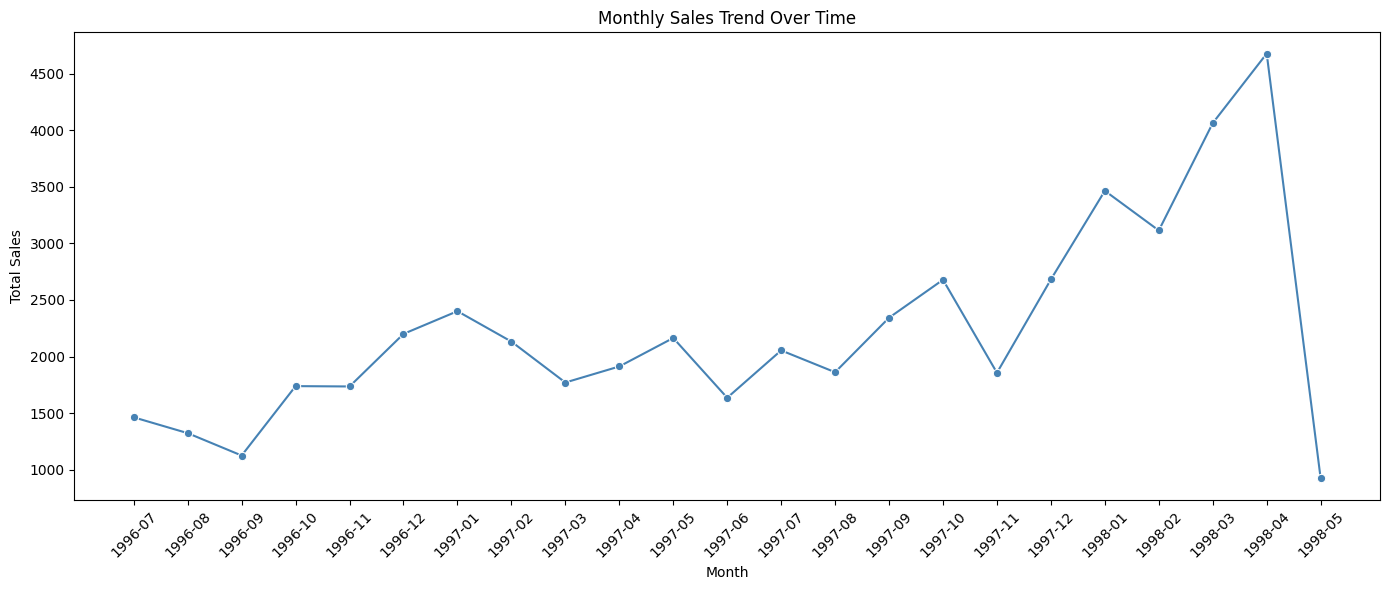

In [18]:
# Line Chart - Monthly Sales Trend Over Time
df["order_date"] = pd.to_datetime(df["order_date"])

df["year_month"] = df["order_date"].dt.to_period("M").astype(str)


if "price" in df.columns:
    df["total_sale"] = df["quantity"] * df["price"]
    monthly_sales = df.groupby("year_month")["total_sale"].sum()
else:
    monthly_sales = df.groupby("year_month")["quantity"].sum()


monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ["Month", "Total Sales"]

plt.figure(figsize=(14, 6))
sns.lineplot(x="Month", y="Total Sales", data=monthly_sales_df, marker="o", color="steelblue")
plt.title("Monthly Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()